# Drill: More clusters?


In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)
df.head()
df[13].unique()

array([0, 2, 1, 3, 4])

In [3]:
# Features and outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

## First Attempt

k-means vs. actual data:
col_0   0   1
row_0        
0      84  65
1      55  99


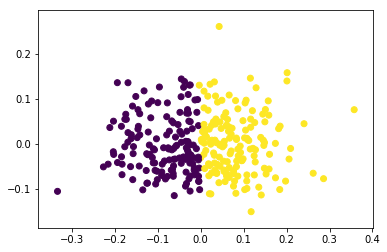

In [4]:
def run_regular_kmeans(num_kmeans):
    # Normalize the data.
    X_norm = normalize(X)

    # Reduce it to num_kmeans components
    X_pca = PCA(2).fit_transform(X_norm)

    # Calculate predicted values
    y_pred = KMeans(n_clusters=num_kmeans, random_state=42).fit_predict(X_pca)

    # Check predicted vs. actual data
    print('k-means vs. actual data:')
    print(pd.crosstab(y_pred, y))
    
    if num_kmeans:
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
        plt.show()
    
    return y_pred, X_pca

y_pred, X_pca = run_regular_kmeans(2)

## Mini-Batch K-Means

In [5]:
def run_minibatch_kmeans(num_kmeans, y_pred, X_pca):
    # Each batch will be made up of 200 data points.
    minibatchkmeans = MiniBatchKMeans(init='random', n_clusters=num_kmeans, batch_size=200)
    minibatchkmeans.fit(X_pca)

    # Add the new predicted cluster memberships to the data frame.
    predict_mini = minibatchkmeans.predict(X_pca)

    # Check the MiniBatch model against our earlier one.
    print('k-means vs. mini-batch k-means:')
    print(pd.crosstab(predict_mini, y_pred))

    return predict_mini

predict_mini = run_minibatch_kmeans(2, y_pred, X_pca)

k-means vs. mini-batch k-means:
col_0    0    1
row_0          
0        0  154
1      149    0


## Your Task

Your task is to take the k-means code here and see what happens when you change the value of k. 

K-Means:  6
k-means vs. actual data:
col_0   0   1
row_0        
0      21  15
1      35  11
2      13  51
3      31  20
4      34  45
5       5  22


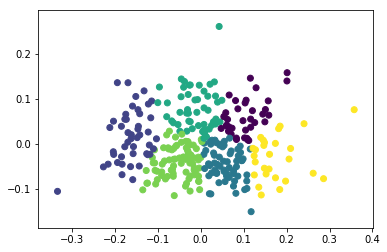

k-means vs. mini-batch k-means:
col_0   0   1   2   3   4   5
row_0                        
0      12   0  40   0   0  16
1       0   0  12   0  52   0
2      12   0   0   0   0  11
3       0  46   0   1   9   0
4       9   0   0  25   0   0
5       3   0  12  25  18   0



K-Means:  5
k-means vs. actual data:
col_0   0   1
row_0        
0      14  57
1      40  28
2      34  46
3      15  22
4      36  11


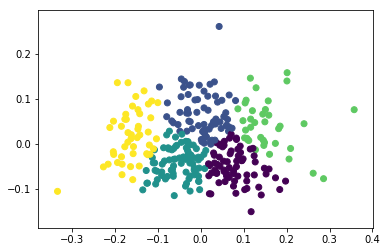

k-means vs. mini-batch k-means:
col_0   0   1   2   3   4
row_0                    
0      45   1  12   0   0
1       3  58   0   6   0
2       0   3   0   0  47
3       0   6  68   0   0
4      23   0   0  31   0



K-Means:  4
k-means vs. actual data:
col_0   0   1
row_0        
0      43  26
1      17  51
2      42  21
3      37  66


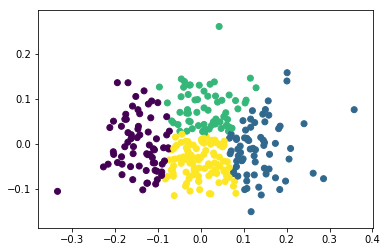

k-means vs. mini-batch k-means:
col_0   0   1   2   3
row_0                
0      58   0   0   5
1      11   0  42   2
2       0  62  17   1
3       0   6   4  95



K-Means:  3
k-means vs. actual data:
col_0   0   1
row_0        
0      49  33
1      26  61
2      64  70


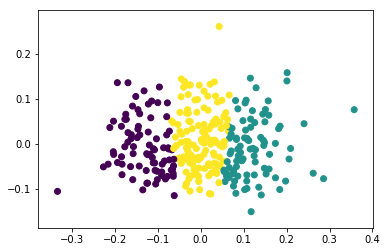

k-means vs. mini-batch k-means:
col_0   0   1   2
row_0            
0       0  87  37
1      31   0  91
2      51   0   6





In [6]:
for num_kmeans in [6, 5, 4, 3]:
    print('K-Means: ', num_kmeans)
    y_pred, X_pca = run_regular_kmeans(num_kmeans)
    predict_mini = run_minibatch_kmeans(num_kmeans, y_pred, X_pca)
    print('\n\n')

- What solution, if any, do you find most compelling? 
- Does complexity start to become an issue with this data set? 

Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.